In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

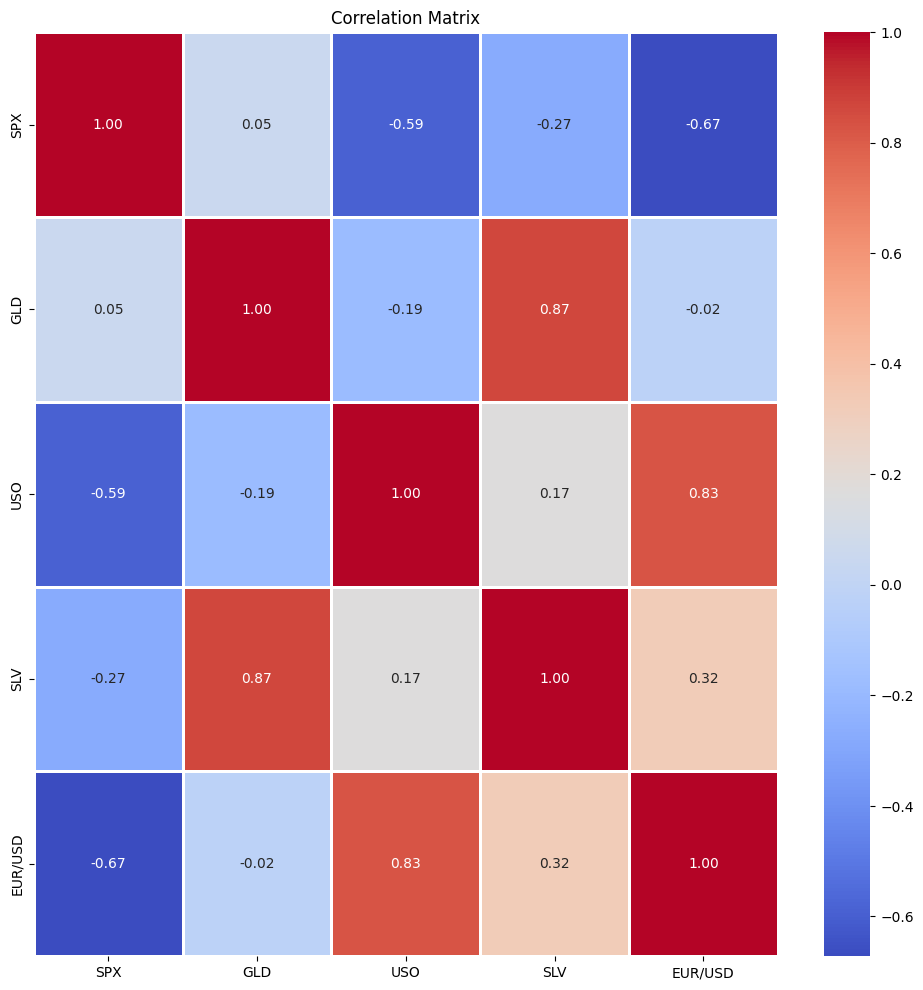

In [9]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1, cbar=True, yticklabels=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
print(numeric_data.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


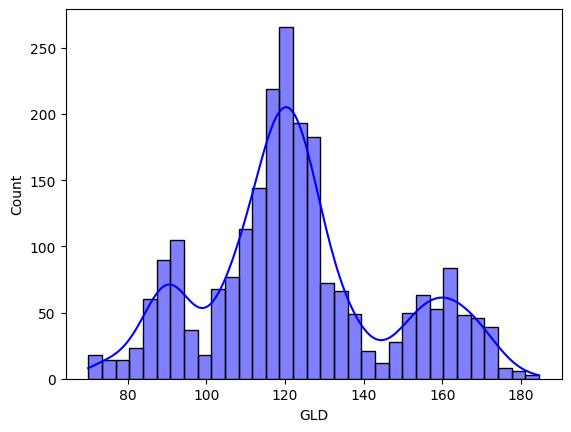

In [15]:
sns.histplot(data['GLD'], color='blue', kde=True)
plt.show()

In [16]:
X = data.drop(['Date', 'GLD'], axis=1)
y = data['GLD']

In [17]:
print(X.shape)
print(y.shape)

(2290, 4)
(2290,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1832, 4)
(458, 4)
(1832,)
(458,)


In [20]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
trining_prediction = model.predict(X_train)
r2_train = r2_score(y_train, trining_prediction)
print('R2 score for training data:', r2_train)

R2 score for training data: 0.9983716249960104


In [22]:
testing_prediction = model.predict(X_test)
r2_test = r2_score(y_test, testing_prediction)
print('R2 score for testing data:', r2_test)

R2 score for testing data: 0.9883436808172708


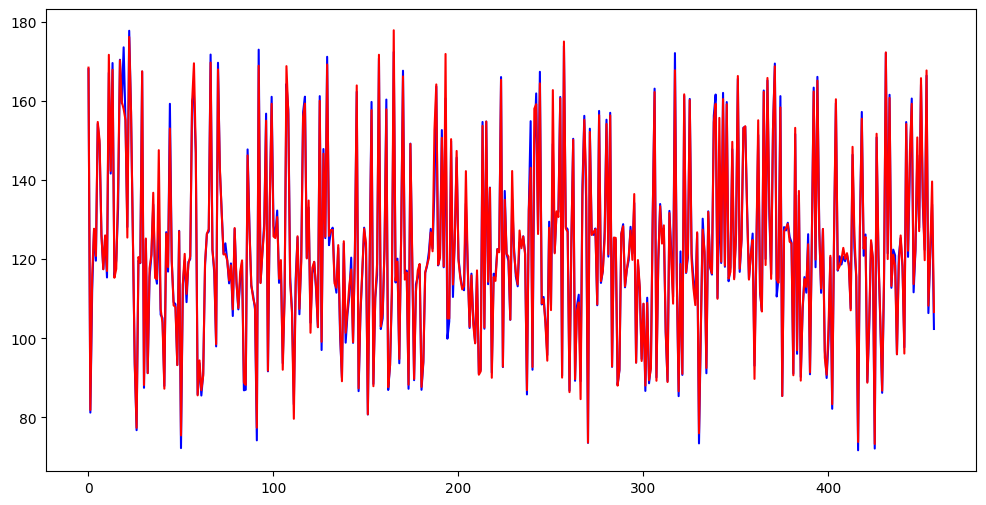

In [23]:
Y_test = list(y_test)
plt.figure(figsize=(12, 6))
plt.plot(Y_test, color='blue', label='Actual Price')
plt.plot(testing_prediction, color='red', label='Predicted Price')